### IDs:
Insert yours IDs to the cell below

ID #1: 204079453

ID #2: 205714447


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


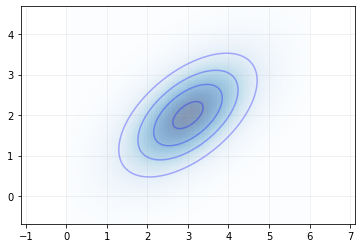

In [2]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [3]:
df = pd.read_csv('heart.csv', index_col=False, sep='\t')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,295.000000,299.000000,298.000000,297.000000,297.000000,300.000000,301.000000,299.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000
mean,54.389831,0.682274,0.969799,131.663300,245.966330,0.150000,0.521595,149.565217,0.326733,1.040604,1.399340,0.729373,2.313531,0.544554
std,9.084668,0.466373,1.032678,17.532242,52.117969,0.357668,0.519967,23.008131,0.469794,1.167458,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).

In [7]:
#df.columns

In [8]:
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
numerical_features = ['age','trestbps','chol','thalach','oldpeak']

In [9]:
print(df.isnull().sum())

age         8
sex         4
cp          5
trestbps    6
chol        6
fbs         3
restecg     2
thalach     4
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
for col in df.columns:
    if col in categorical_features:
        mode = df[col].mode()[0]
        df[col].fillna(mode, inplace=True)
    elif col in numerical_features:
        median = df[col].median()
        df[col].fillna(median,inplace=True)     

In [11]:
# Validation:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 

In [12]:
health_data = df[df['target'] == 0]
health_size = health_data.count() 

In [13]:
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
health_df = df[df['target'] == 0]
disease_df = df[df['target'] == 1]
n_health , n_disease= len(health_df), len(disease_df)

for num_col in numerical_features:
    health_mean, health_var = health_df[num_col].mean(), (health_df[num_col].std()**2)
    disease_mean, disease_var = disease_df[num_col].mean(), (disease_df[num_col].std()**2)
    SE = np.sqrt(health_var/n_health + disease_var/n_disease)
    lower_bound = health_mean - disease_mean - z*SE
    upper_bound = health_mean - disease_mean + z*SE
    if lower_bound <0 and upper_bound >0:
        print(f"For {num_col} The confidence interval is:[{round(lower_bound,3)},{round(upper_bound,3)}]")
        print("Therorfe we can't determine which population mean is higher.\n")
    elif lower_bound > 0:
        print(f"For {num_col} The confidence interval is:[{round(lower_bound,3)},{round(upper_bound,3)}]")
        print("Therorfe in confidence of 95% the healthy population mean is larger than the disease population mean\n")
    elif upper_bound < 0:
        print(f"For {num_col} The confidence interval is:[{round(lower_bound,3)},{round(upper_bound,3)}]")
        print("Therorfe in confidence of 95% the healthy population mean is smaller than the disease population mean\n")
    

For age The confidence interval is:[2.206,6.097]
Therorfe in confidence of 95% the healthy population mean is larger than the disease population mean

For trestbps The confidence interval is:[1.136,9.031]
Therorfe in confidence of 95% the healthy population mean is larger than the disease population mean

For chol The confidence interval is:[-2.893,20.244]
Therorfe we can't determine which population mean is higher.

For thalach The confidence interval is:[-24.112,-14.592]
Therorfe in confidence of 95% the healthy population mean is smaller than the disease population mean

For oldpeak The confidence interval is:[0.735,1.231]
Therorfe in confidence of 95% the healthy population mean is larger than the disease population mean



In [14]:
## Add graph bar seaborn.. 

Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

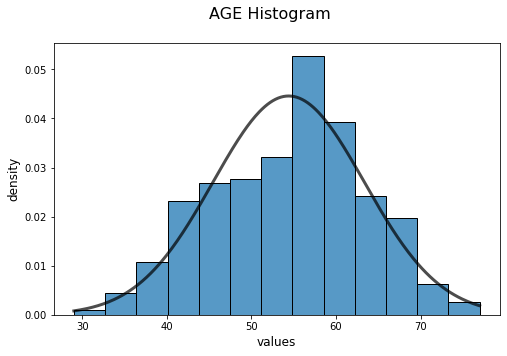

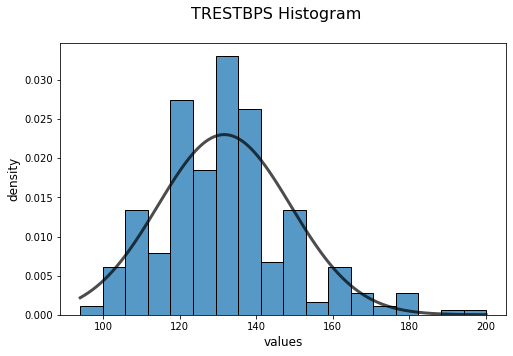

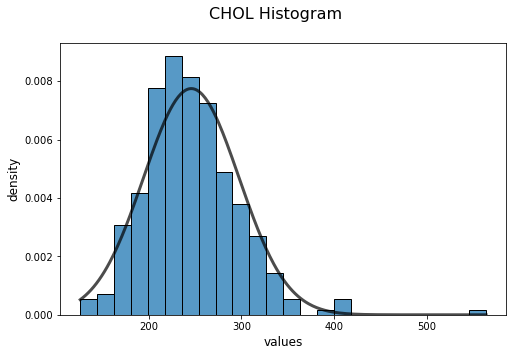

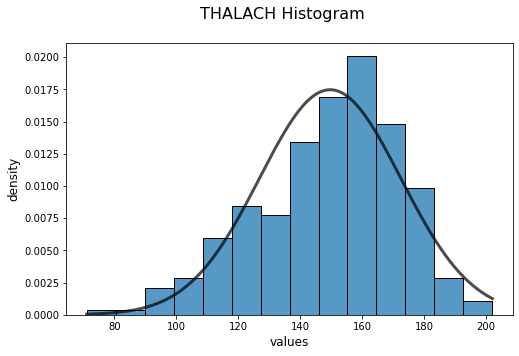

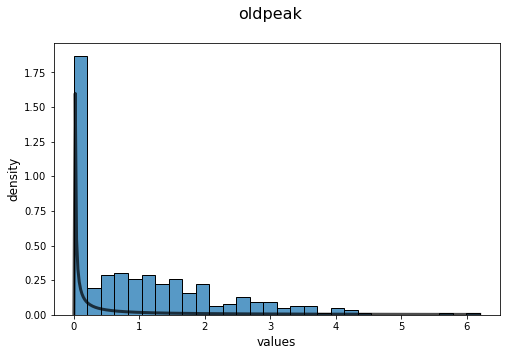

In [15]:
norm_dist_list = ['age','trestbps','chol','thalach']
lognorm_dist_list = 'oldpeak'

# Histogram for features with normal approximation:
for col in norm_dist_list:
    
    fig, ax = plt.subplots(figsize=(8,5))
    fig.suptitle(str(col.upper())+" Histogram", fontsize=16)
    ax = sns.histplot(data=df[col],stat='density')
    ax.set_xlabel('values', size=12)
    ax.set_ylabel('density', size=12)
    
    mean, std = stats.norm.fit(df[col])
    x_range = np.linspace(df[col].min(), df[col].max(),303)
    ax.plot(x_range, stats.norm.pdf(x_range, mean, std),color='k', lw=3,alpha=0.7)
    
    plt.show()

# Histogram for features with log-normal approximation:
# Defintion of area..
# Since the formula of log-normal consist e in power, there is no chance that the values will be equal to 0
# Therfore we shift all the 0s a bit (from 0 to 0.01)
lognorm_dist_shift = df[lognorm_dist_list].replace([0],0.01).copy()

fig, ax = plt.subplots(figsize=(8,5))
fig.suptitle(lognorm_dist_list, fontsize=16)

shape, loc, scale = stats.lognorm.fit(lognorm_dist_shift)


sns.histplot(x=lognorm_dist_list, ax=ax, bins=30, data=df, stat='density')
ax.set_xlabel('values', size=12)
ax.set_ylabel('density', size=12)
x = np.linspace(df[lognorm_dist_list].min(), df[lognorm_dist_list].max(), 303)
ax.plot(x, stats.lognorm.pdf(x, shape, loc=loc, scale=scale),color='k',lw=3, alpha=0.7)
plt.show()



For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).

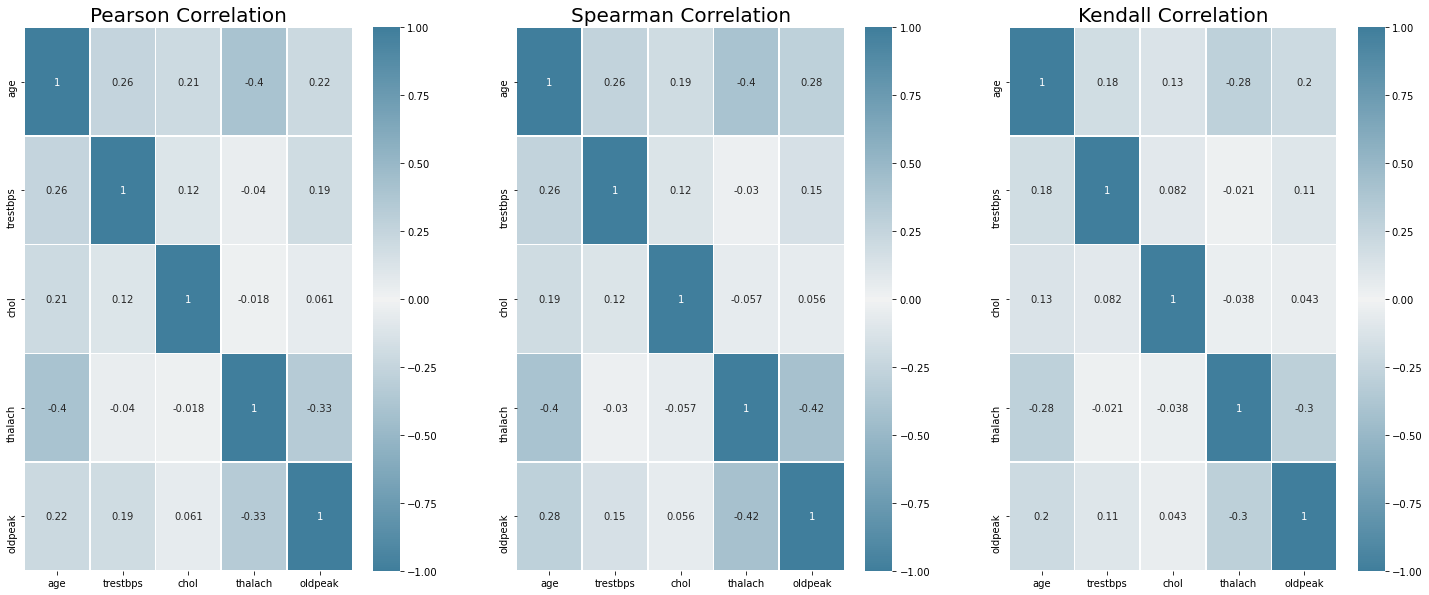

In [16]:
df_num = df[numerical_features]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,10))
cmap = sns.diverging_palette(230, 230, as_cmap=True)
sns.heatmap(df_num.corr(method='pearson'), ax=ax[0], annot=True, center=0, cmap= cmap,linewidths=0.5, vmin = -1)
ax[0].set_title('Pearson Correlation', size=20)
sns.heatmap(df_num.corr(method='spearman'), ax=ax[1], annot=True, center=0, cmap=cmap, linewidths=0.5,vmin = -1)
ax[1].set_title('Spearman Correlation', size=20)
sns.heatmap(df_num.corr(method='kendall'), ax=ax[2], annot=True, center=0, cmap=cmap, linewidths=0.5,vmin = -1)
ax[2].set_title('Kendall Correlation', size=20)

plt.show()

Based on correlation matrixes above we can infer that there is not strong correlation in the features. 
Still, we will test the p-value for the pairs with the highest correlation. 

<b>Testing age and thalach (maximum heart rate achieved): </b>

In [17]:
# Calculating p-value with pearson:
p_value_age_thalach_pearson = stats.pearsonr(df_num['age'],df_num['thalach'])[1]
# Calculating p-value with spearman:
p_value_age_thalach_spearman = stats.spearmanr(df_num['age'],df_num['thalach'])[1]

In [18]:
#p_value_age_thalach_pearson

In [19]:
#p_value_age_thalach_spearman

In [20]:
print(f"The p-value of according to the pearson calculatin of the features age and thalach is: {p_value_age_thalach_pearson}")

The p-value of according to the pearson calculatin of the features age and thalach is: 3.5560437387669506e-13


<b>Testing thalach and oldpeak (ST depression induced by exercise relative to rest): </b>

In [21]:
p_value_thalach_oldpeak_spearman = stats.spearmanr(df_num['oldpeak'],df_num['thalach'])[1]

In [22]:
print(f"The p-value of according to the spearman calculatin of the features oldpeak and thalach is: {p_value_thalach_oldpeak_spearman}")

The p-value of according to the spearman calculatin of the features oldpeak and thalach is: 2.636153661049674e-14


<b>Conclusion:</b>
<br>Even though we got significant results for both pairs [(thalach,age),(oldpeak,thalach)], we can not say that the correlation is strong. 

 Need to review -  draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits.

<b>Age and Thalach</b>

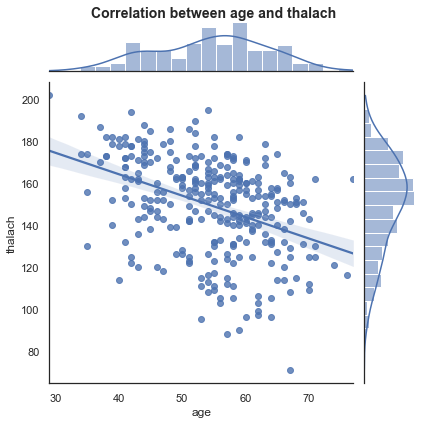

In [23]:
sns.set_theme(style="white")
p =  sns.jointplot(x='age', y='thalach', data=df_num, marginal_kws=dict(bins=20), kind='reg')
p.fig.suptitle("Correlation between age and thalach",fontsize = 14, fontweight='bold')
p.fig.subplots_adjust(top=0.95)
plt.show()

<b>Oldpeak and Thalach</b>

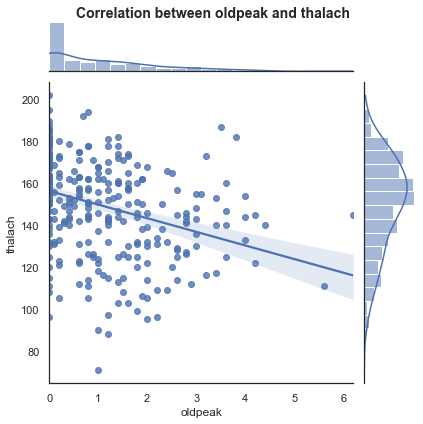

In [24]:
sns.set_theme(style="white")
p =  sns.jointplot(x='oldpeak', y='thalach', data=df_num,marginal_kws=dict(bins=20), kind='reg')
p.fig.suptitle("Correlation between oldpeak and thalach",fontsize = 14, fontweight='bold')
p.fig.subplots_adjust(top=0.95)
plt.show()

 Need to review - Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).

In [25]:
def plot_2d_Gaussian_pdf(x_label, y_label, means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.set_xlim([25, 50])
    ax.axis('equal')
    ax.grid(alpha=0.2)
    ax.set_title(f"{x_label} and {y_label}", size=20)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    plt.show()


<ipython-input-25-4ad8d6cd79bf>:10: UserWarning: No contour levels were found within the data range.
  ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),


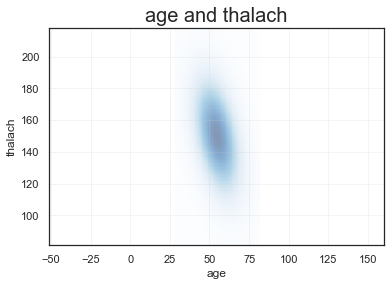

In [26]:
age_mean = df_num['age'].mean()
thalach_mean = df_num['thalach'].mean()
means = [age_mean, thalach_mean]

df_cov = df[['age','thalach']].cov()
cov = df_cov.to_numpy()

plot_2d_Gaussian_pdf('age','thalach',means, cov)


<ipython-input-25-4ad8d6cd79bf>:10: UserWarning: No contour levels were found within the data range.
  ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),


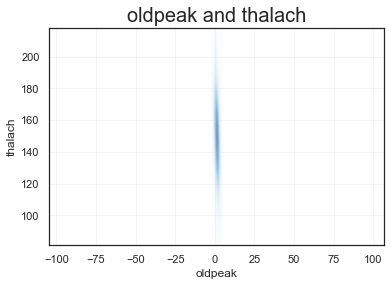

In [27]:
oldpeak_mean = df_num['oldpeak'].mean()
means = [oldpeak_mean, thalach_mean]

df_cov = df[['oldpeak','thalach']].cov()
cov = df_cov.to_numpy()

plot_2d_Gaussian_pdf('oldpeak','thalach',means, cov)

Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?

In [28]:
df_male = df[df['sex']==1][numerical_features]
df_female = df[df['sex']==0][numerical_features]

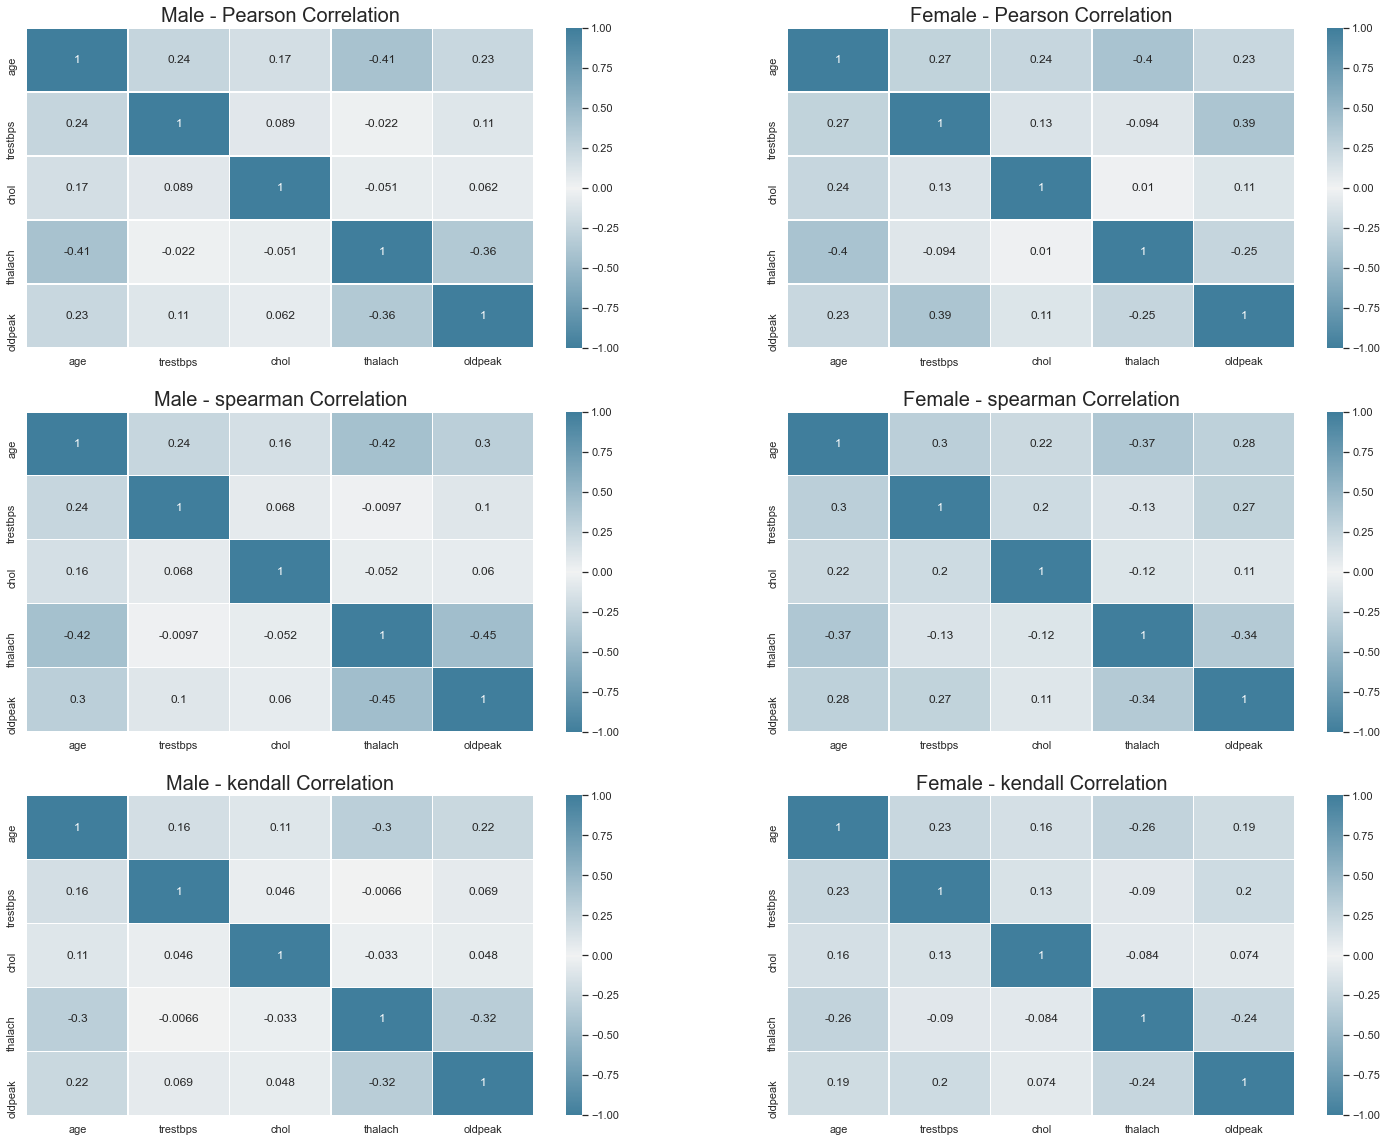

In [29]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,20))
cmap = sns.diverging_palette(230, 230, as_cmap=True)

sns.heatmap(df_male.corr(method='pearson'), ax=ax[0][0], annot=True, center=0, cmap= cmap,linewidths=0.5, vmin = -1)
ax[0][0].set_title('Male - Pearson Correlation', size=20)
sns.heatmap(df_female.corr(method='pearson'), ax=ax[0][1], annot=True, center=0, cmap=cmap, linewidths=0.5,vmin = -1)
ax[0][1].set_title('Female - Pearson Correlation', size=20)

sns.heatmap(df_male.corr(method='spearman'), ax=ax[1][0], annot=True, center=0, cmap= cmap,linewidths=0.5, vmin = -1)
ax[1][0].set_title('Male - spearman Correlation', size=20)
sns.heatmap(df_female.corr(method='spearman'), ax=ax[1][1], annot=True, center=0, cmap=cmap, linewidths=0.5,vmin = -1)
ax[1][1].set_title('Female - spearman Correlation', size=20)

sns.heatmap(df_male.corr(method='kendall'), ax=ax[2][0], annot=True, center=0, cmap= cmap,linewidths=0.5, vmin = -1)
ax[2][0].set_title('Male - kendall Correlation', size=20)
sns.heatmap(df_female.corr(method='kendall'), ax=ax[2][1], annot=True, center=0, cmap=cmap, linewidths=0.5,vmin = -1)
ax[2][1].set_title('Female - kendall Correlation', size=20)

plt.show()

In [30]:
health_num_df = df[df['target'] == 0][numerical_features]
disease_num_df = df[df['target'] == 1][numerical_features]

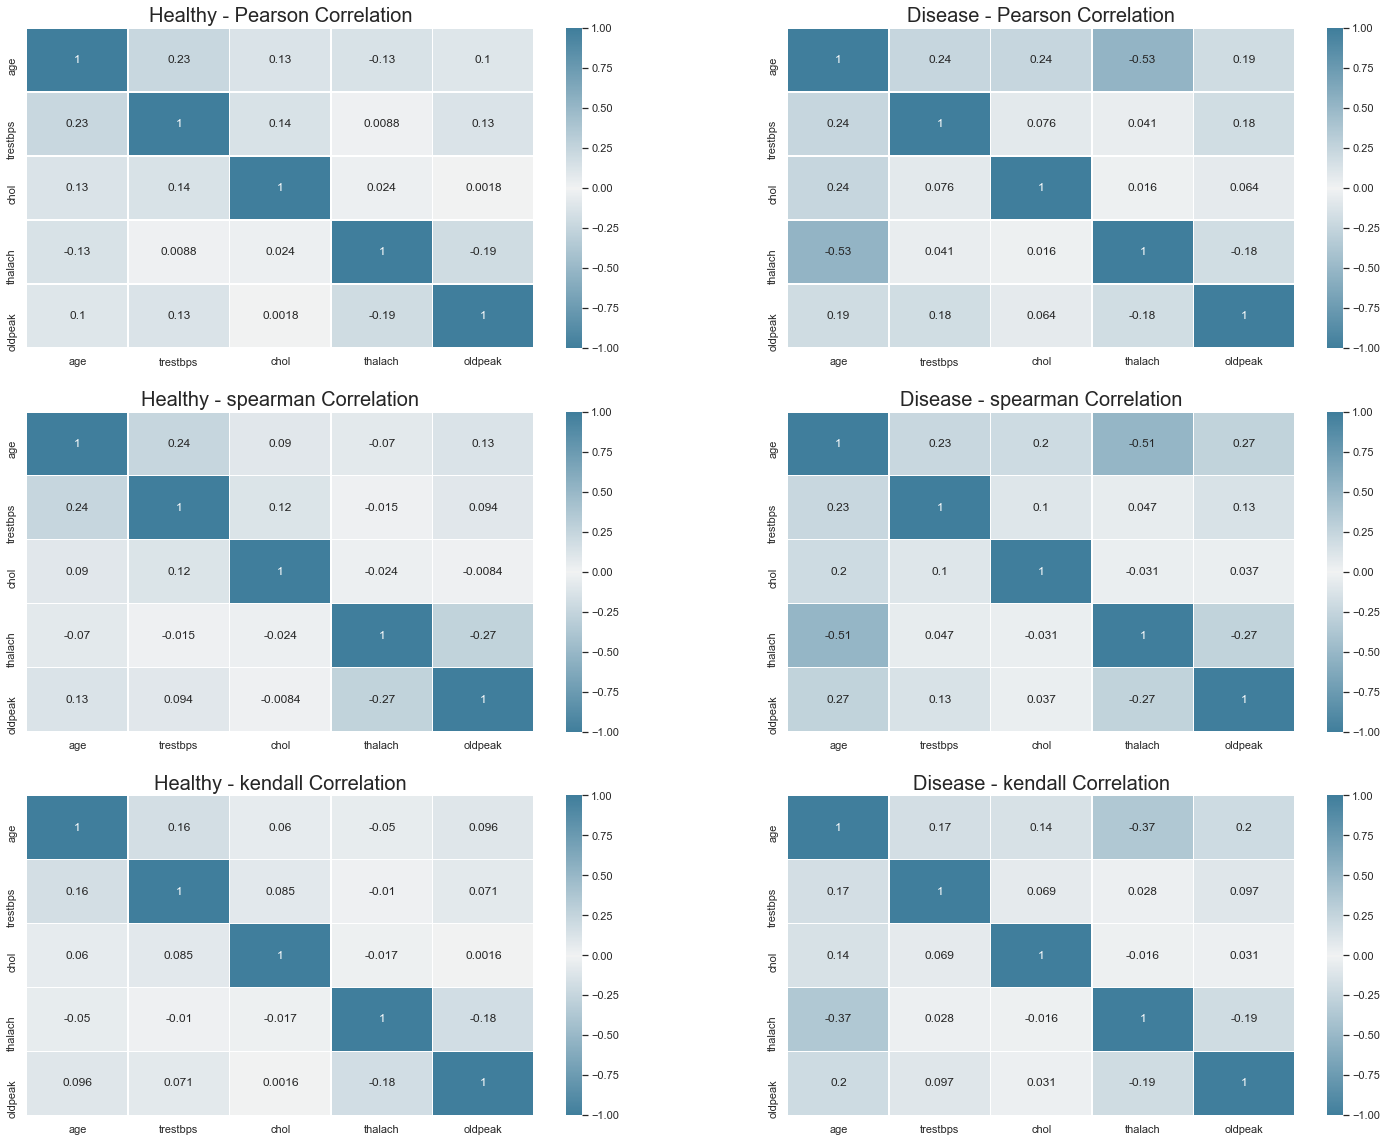

In [31]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,20))
cmap = sns.diverging_palette(230, 230, as_cmap=True)

sns.heatmap(health_num_df.corr(method='pearson'), ax=ax[0][0], annot=True, center=0, cmap= cmap,linewidths=0.5, vmin = -1)
ax[0][0].set_title('Healthy - Pearson Correlation', size=20)
sns.heatmap(disease_num_df.corr(method='pearson'), ax=ax[0][1], annot=True, center=0, cmap=cmap, linewidths=0.5,vmin = -1)
ax[0][1].set_title('Disease - Pearson Correlation', size=20)

sns.heatmap(health_num_df.corr(method='spearman'), ax=ax[1][0], annot=True, center=0, cmap= cmap,linewidths=0.5, vmin = -1)
ax[1][0].set_title('Healthy - spearman Correlation', size=20)
sns.heatmap(disease_num_df.corr(method='spearman'), ax=ax[1][1], annot=True, center=0, cmap=cmap, linewidths=0.5,vmin = -1)
ax[1][1].set_title('Disease - spearman Correlation', size=20)

sns.heatmap(health_num_df.corr(method='kendall'), ax=ax[2][0], annot=True, center=0, cmap= cmap,linewidths=0.5, vmin = -1)
ax[2][0].set_title('Healthy - kendall Correlation', size=20)
sns.heatmap(disease_num_df.corr(method='kendall'), ax=ax[2][1], annot=True, center=0, cmap=cmap, linewidths=0.5,vmin = -1)
ax[2][1].set_title('Disease - kendall Correlation', size=20)

plt.show()

In [32]:
p_value_age_thalach_spearman = stats.spearmanr(df_num['age'],df_num['thalach'])[1]

In [33]:
#Calculating p-value with spearman:
p_value_male_oldpeak_thalach_spearman = stats.spearmanr(df_male['oldpeak'],df_male['thalach'])[1]
#Calculating p-value with pearson:
p_value_disease_age_thalach_pearson = stats.pearsonr(disease_num_df['age'],disease_num_df['thalach'])[1]


In [34]:
#p_value_male_oldpeak_thalach_spearman

In [35]:
#p_value_disease_age_thalach_pearson

<b>Conclusion:</b>
<br>Same as the prior findings there is not strong correlation in the diffrente segments.
<br>Even though we got significant results for both pairs [(thalach,age),(oldpeak,thalach)], we can not say that the correlation is strong. 


For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

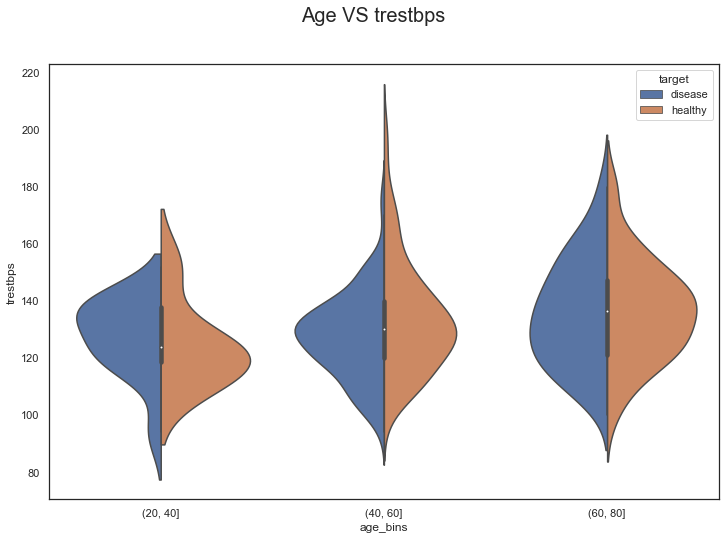

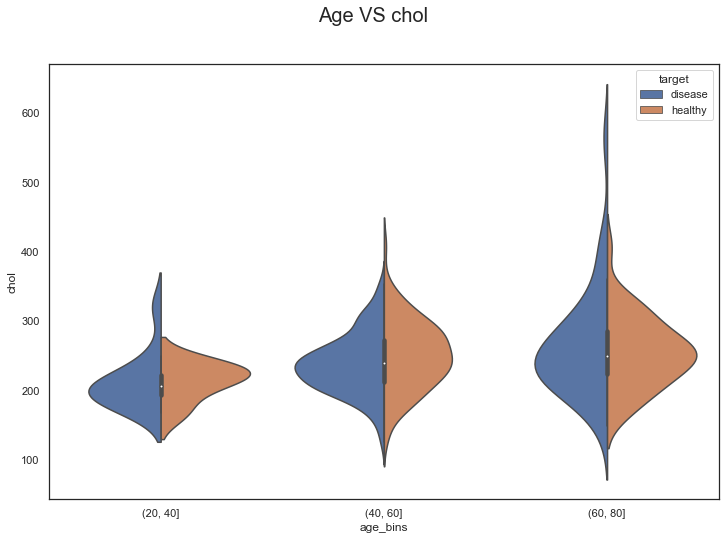

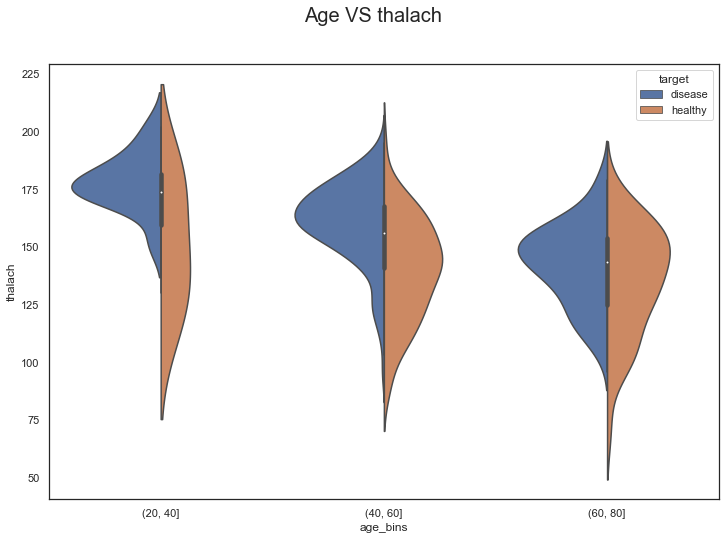

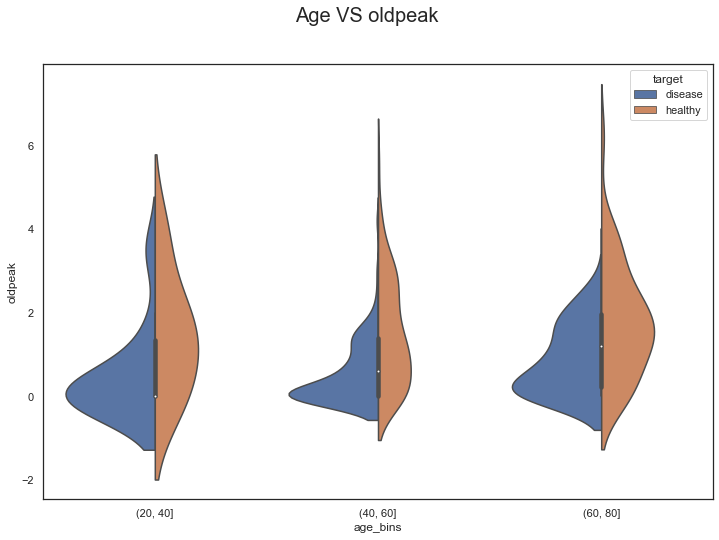

In [36]:
df_num_violin = df_num.loc[:, df_num.columns != 'age']
cols = df_num_violin.columns

df_num_violin['target'] = df['target']
df_num_violin['target'] = np.where(df_num_violin['target']==0,'healthy','disease')

age_bins = np.array([20,40,60,80])
df_num_violin['age_bins'] = pd.cut(x=df['age'], bins=age_bins)

for col in cols:
    fig, ax = plt.subplots(figsize=(12,8))
    fig.suptitle(f"Age VS {col}", fontsize=20) 
    sns.violinplot(x='age_bins', y=col, hue='target', data=df_num_violin,split=True)
    plt.show()

    
    

Suggest, state and address at least one original question.


### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (15 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

<b>Answer:</b>
<br>The standard log-normal distribution has a heavy right tail.
<br><u>Proof:</u>
<br>
<br>Y = $e^{X}$, has a log normal distribution if its log, log(Y), has a normal (Gaussian) distribution.
<br>$$\lim_{y\to\infty} e^{ty}P(Y > y) = \lim_{y\to\infty} e^{ty}\big(1-P(Y \leq y)\big) = \lim_{y\to\infty} e^{ty}\big(1-P(e^X \leq y)\big) = \lim_{y\to\infty} e^{ty}\big(1-P(X \leq ln y)\big) = \lim_{y\to\infty} e^{ty}\big(1-\phi(ln y)\big) =\lim_{y\to\infty} \frac{1-\phi(ln y)}{e^{-ty}}$$
Due to L'Hôpital's rule: $$\lim_{y\to\infty} \frac{\phi(ln y)}{t e^{-ty}} = \lim_{y\to\infty} \frac{\frac{1}{y \sqrt{2\pi}}e^{-\frac{(ln y)^2}{2}}}{t e^{-ty}} = \lim_{y\to\infty} \frac{e^{ty}} {e^{\frac {(ln y)^2}{2}} ty \sqrt{2\pi}}$$

Exponentials grow faster than powers that grow faster than logs.
Therfore the overall limit goes to infinity. 
$$\lim_{y\to\infty} e^{ty}P(Y > y) \to \infty$$

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

$\int_{0}^{\infty} \int_{0}^{b} f(x_{a},x_{b})da db 
$<br>$ \int_{0}^{\infty} \int_{0}^{b} \lambda_{2}\cdot e^{-\lambda_{2}\cdot b} \cdot \lambda_{1}\cdot e^{-\lambda_{1}\cdot a} da db 
$<br>$ \int_{0}^{\infty} \lambda_{2}\cdot e^{-\lambda_{2}\cdot b} \int_{0}^{b} \lambda_{1}\cdot e^{-\lambda_{1}\cdot a} dadb 
$<br>$ \int_{0}^{\infty} \lambda_{2}\cdot e^{-\lambda_{2}\cdot b} \cdot  (1 - e^{-\lambda_{1}\cdot b}) db 
$<br>$ \int_{0}^{\infty} \lambda_{2}\cdot e^{-\lambda_{2}\cdot b} - \int_{0}^{\infty} \lambda_{2}\cdot e^{-b\cdot(\lambda_{1}+\lambda_{2}}) db
$<br>$ 1 - \frac {\lambda_{2}}{\lambda_{1}+\lambda_{2}}
$<br><b>final-
<br>$ \frac {\lambda_{1}}{\lambda_{1}+\lambda_{2}}$

### Question 4 - CLT for Markov chains (15 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

<b>Answer:</b>
<br>It can be seen that each row of the matrix sums to 1, and each column also sums to 1. 
<br>This represents the doubly stochastic matrix.
<br>Moreover the limiting-state probabilities exist with the eigenvalue: $(\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6})$
<br>Thus we expect an averqae of ${E({\frac {\sum_{i=0}^{29} (X_i)}{30})}} = \frac {{\sum_{i=0}^{29} E(X_i)}}{30} = \frac {30 \cdot E(X_0)}{30} = E(X_0) = \frac {1+6}{2} = 3.5$

In [37]:
def trajectory (states, traj_len, num_traj, trans_matrix):
    
    results = np.empty(traj_len,dtype=int)
    final_results = np.empty(num_traj)
    # choose uniformly from 1-6:
    results[0] = np.random.choice(states)
    
    for j in range (num_traj):
        for i in range(0,traj_len-1):
            pos_in_matrix = results[i]-1
            results[i+1] = np.random.choice(states,size=1 ,p=trans_matrix[pos_in_matrix])
        final_results[j] = np.mean(results)
    return final_results

In [38]:
trans_matrix = np.array([[0.4, 0.2, 0.1, 0.0, 0.1, 0.2], 
              [0.2, 0.4, 0.2, 0.1, 0.0, 0.1], 
              [0.1, 0.2, 0.4, 0.2, 0.1, 0.0], 
              [0.0, 0.1, 0.2, 0.4, 0.2, 0.1], 
              [0.1, 0.0, 0.1, 0.2, 0.4, 0.2], 
              [0.2, 0.1, 0.0, 0.1, 0.2, 0.4]])

states = np.array(range(1,7))

In [48]:
markov_dice_averages_4a = trajectory (states, 30,1000,trans_matrix)

In [69]:
def histogram (x, normal_fit = False, print_value=False):
    fig, ax = plt.subplots(figsize=(8,5))
    std = np.std(x)
    mean = np.mean(x)
    
    if print_value:
        print(f"The empirical mean: {round(mean,3)}")
        print(f"The empirical std: {round(std,3)}")
    
    if normal_fit:
        bins =plt.hist(x,bins=20,density=True)[1]
        ax.set_xlabel('values', size=12)
        ax.set_ylabel('density', size=12)
        fig.suptitle(f"Age VS {col}", fontsize=20) 
        bins_update = np.linspace(np.min(bins),np.max(bins),1000)
        fig.suptitle(f"Trajectories Avg. Histogram", fontsize=16,fontweight='bold')
        line=stats.norm.pdf(bins_update,mean,std)
        plt.plot(bins_update,line)  
        plt.show()
    else:
        sns.histplot(x=x,bins=20)
        fig.suptitle(f"Trajectories Avg. Histogram", fontsize=16,fontweight='bold')
        ax.set_xlabel('values', size=12)
        ax.set_ylabel('count', size=12)
        plt.show()

The empirical mean: 3.4
The empirical std: 0.484


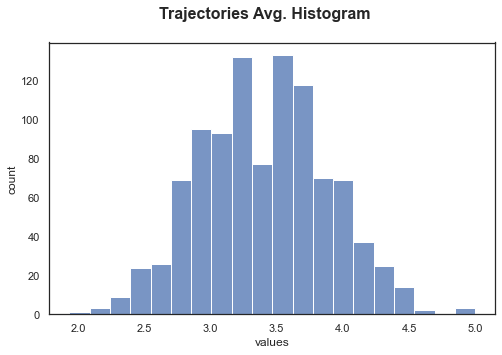

In [70]:
histogram(markov_dice_averages_4a, print_value=True)

The distribution looks like a normal distribution. 

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In 4.A we expected to get an average of 3.5, we noticed that the empirical average was close to 3.5 but not exactly. Therefore, by increasing the length of each trajectory in the experiment we expect to get an even closer value to 3.5

In [71]:
markov_dice_averages_4b = trajectory (states, 500,1000,trans_matrix)

The empirical mean: 3.495
The empirical std: 0.124


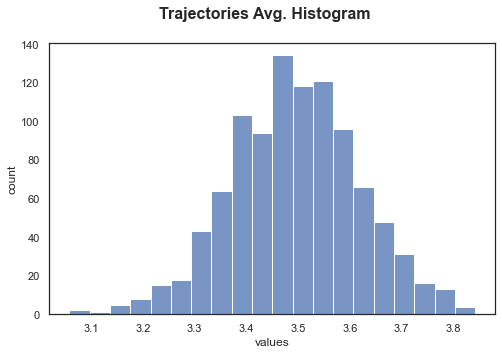

In [72]:
histogram(markov_dice_averages_4b, print_value=True)

The distribution looks like a normal distribution. 

#### 4.C
Draw normal fit curves on your two histograms.

The empirical mean: 3.4
The empirical std: 0.484


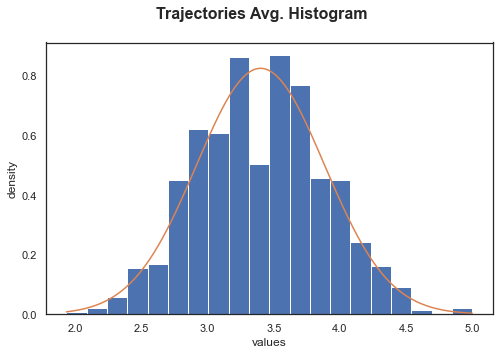

In [73]:
histogram(markov_dice_averages_4a,normal_fit = True, print_value=True)

The empirical mean: 3.495
The empirical std: 0.124


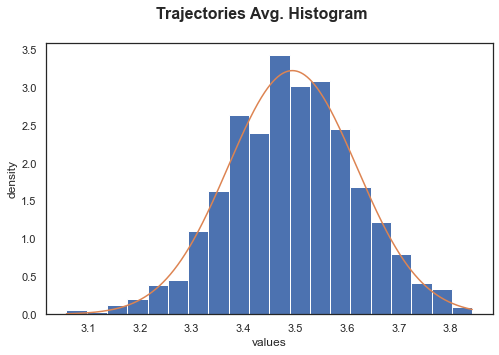

In [74]:
histogram(markov_dice_averages_4b,normal_fit = True, print_value=True)

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

<b>Answer:</b>
<br>The covariance formula is: $Cov(X_0, X_i) = E(X_0X_i) - E(X_0)E(X_i)$
<br>As calculated and explained at the first section-4A, $E(X_0)$ is the uniform expected value which is 3.5
<br>In additon, this is the expected value for every $X_i$.

<br>We still need to calculate $E(X_0X_i)$ we will do that by using the definition of the joint distribution and we'll go over $k^2$ elements multiplied by $P(X_0,X_i)$ accordingly:  
${\sum_{x=1}^{k}\sum_{y=1}^{k} x \cdot y \cdot P(X_0 = x) \cdot T^i[x,y]}$

In [133]:
def calculate_cov (states, traj_len ,trans_matrix):
    cov_arr = np.empty(traj_len)
    # uniformly expected value:
    e_x = np.average(states)
    values = np.outer(states,states).flatten()
    
    for i in range(1,traj_len):
        t_i = np.linalg.matrix_power(trans_matrix,i).flatten()
        e_xy = np.average(values,weights=t_i)
        cov_i = e_xy - (e_x**2)
        cov_arr[i]=cov_i
    return cov_arr 

In [136]:
#calculate_cov(states,500,trans_matrix)

#### 4.E - Bonus (5 Points)
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

<b>Answer</b>
<br>As shown in the previous section: $X_0$, is $U(1,6)$ with doubly stochastic matrix therfore $\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$ 
<br>Since the transition matrix is a stationary matrix, we know that: $\pi_1 =\pi_0 \cdot T= \pi_0$
<br>So, $\pi_n=\pi_0$, hence: $E(X_0)=X\cdot \pi_0=X\cdot \pi_n=E(\bar{X_n})$
<br>In our case, $E(X_0)=E(\bar{X_n})=3.5$

In [ ]:
## Later on to decide... 

### Question 5 - Distributions (15 Points)

Let $X$ be a random variable with a median value $Med(X) = m$. Recall that this means that $P(X\le m)=0.5$.

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Without loss generality, assume that the observations are sorted. That is, $x_1 \le x_2 \le ... \le x_n$. Also assume that $n$ is odd and $n > 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $x_i \le m$.

1. What is the distribution of $R$?
1. Given $n$, compute a function $\lambda (n)$ so that $P(x_{\lambda (n)} \le m) \ge 0.95)$ and $P(x_{\lambda (n)+1} \le m) < 0.95)$.